In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import AFAI_parallelGPU as afai_parallel
import torch

In [3]:
%autoreload 2

In [4]:
period = 2
hopping1 = - np.pi/(2)
hopping2 = - 3 * np.pi/(2)
hopping3 = - 5 * np.pi/(2)

In [5]:
model20 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=20, nx=20, device='cuda:0')
model30 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=30, nx=30, device='cuda:0')
model40 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=40, nx=40, device='cuda:0')
model50 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping3, ny=50, nx=50, device='cuda:0')

In [6]:
model30_1 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping1, ny=30, nx=30, device='cuda:0')

In [7]:
model30_2 = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping2, ny=30, nx=30, device='cuda:0')

In [55]:
_, _, wavefunction = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=0, theta_x=0, theta_y=0)

In [56]:
print(wavefunction.shape)

torch.Size([2500, 2500])


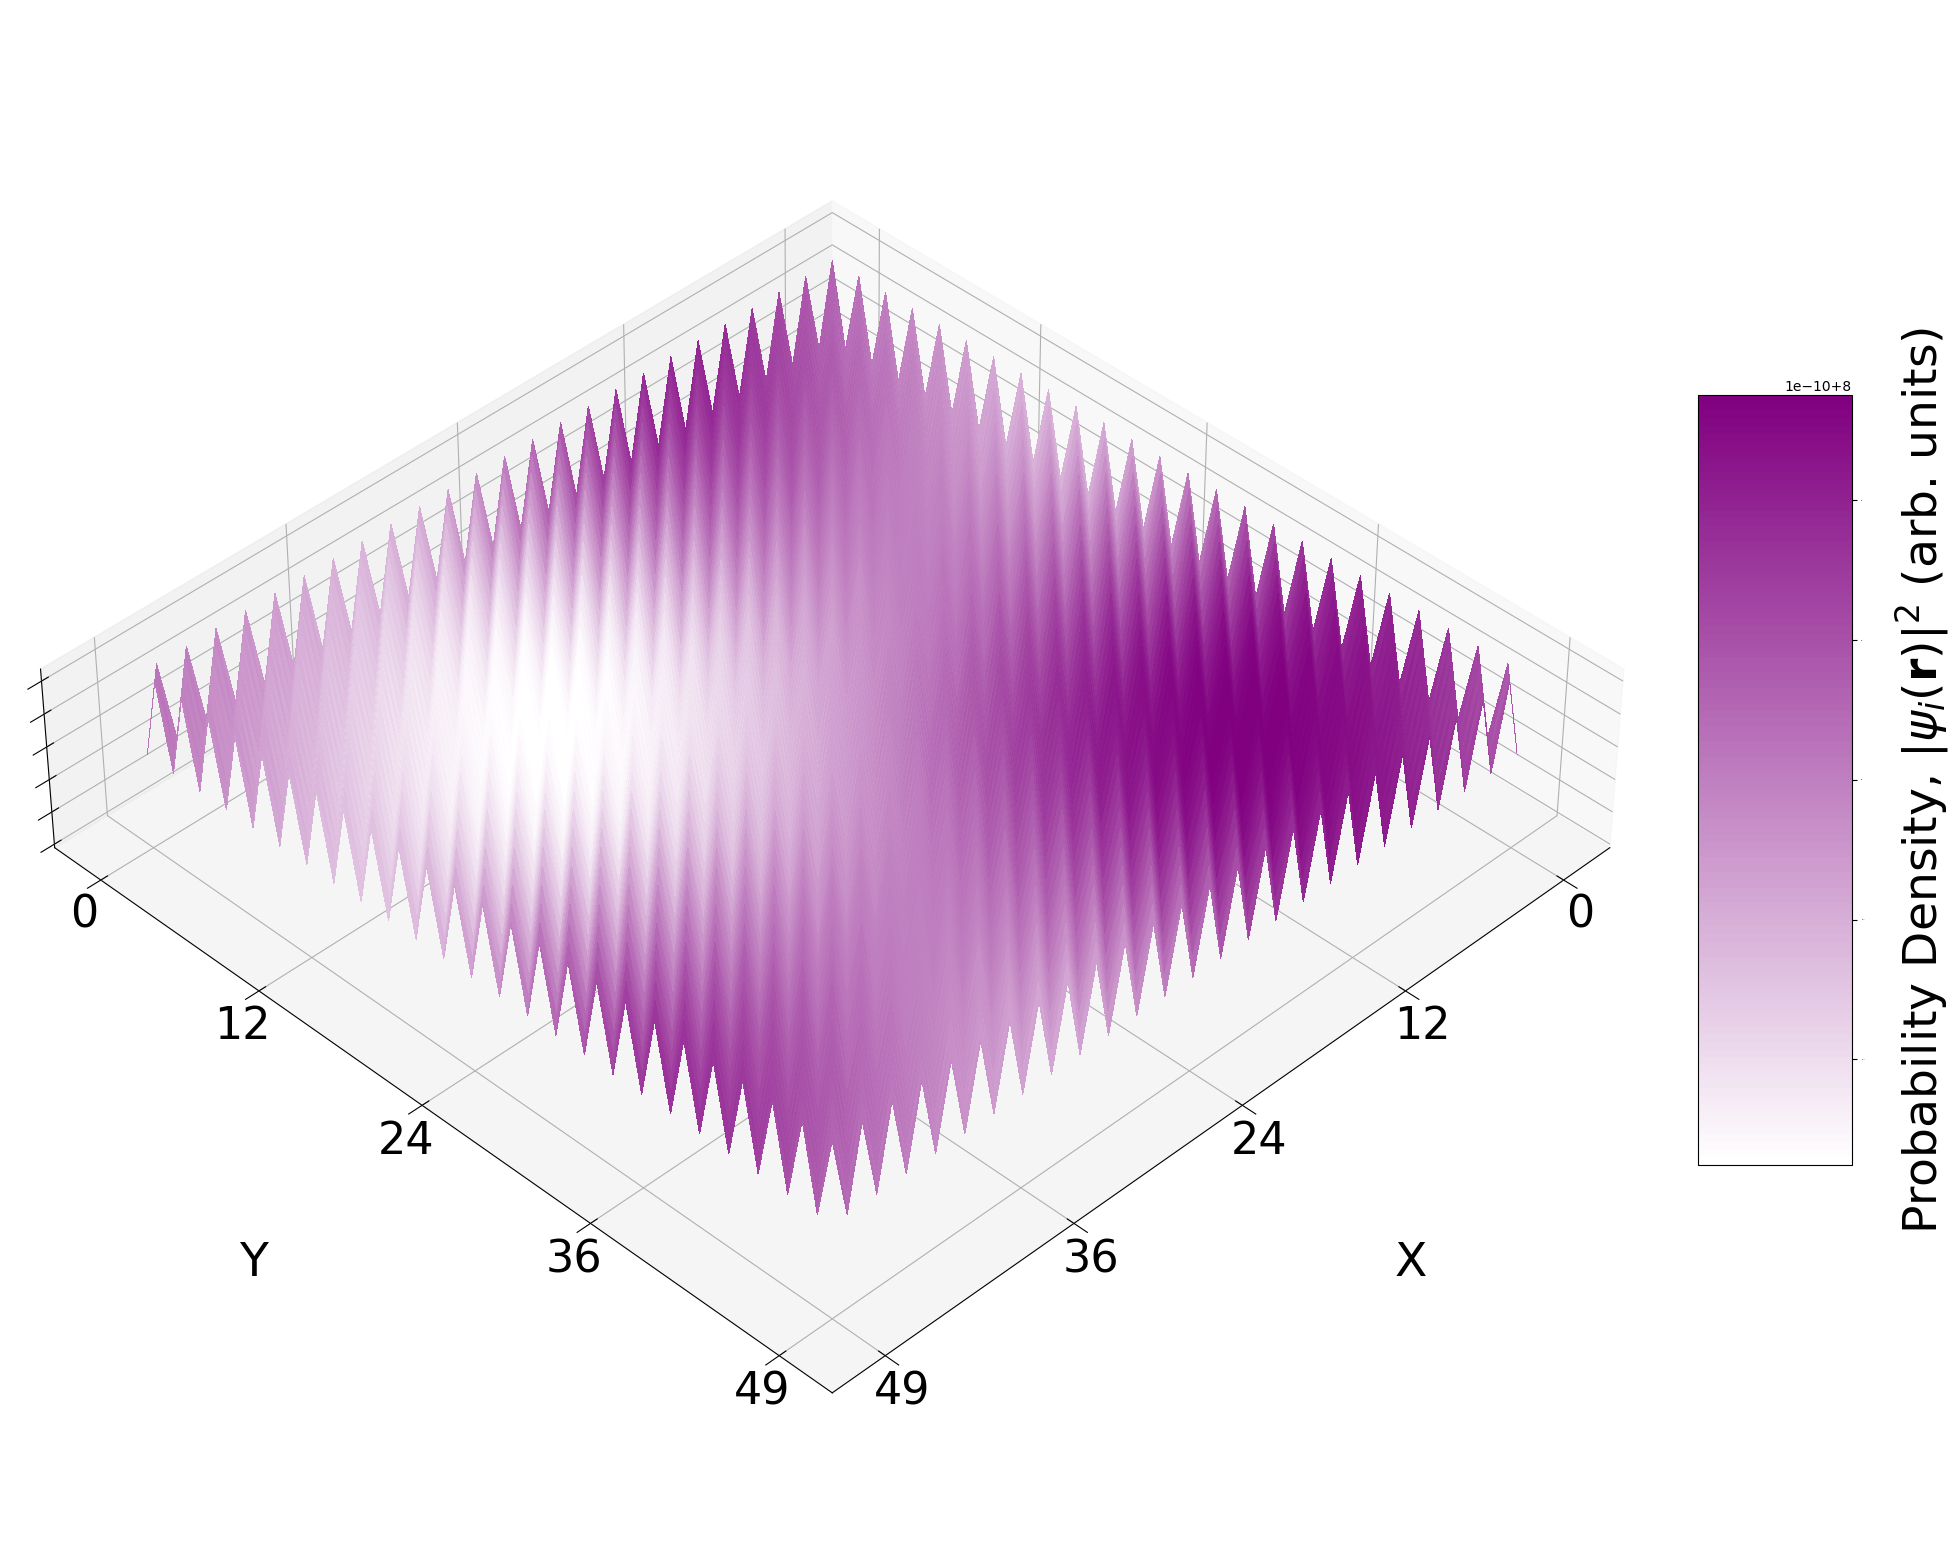

In [254]:
model50.eigenstate_prob_density(wavefunction[:,0], figsize=(30,20), scale_factor=2e4, save_path="delocalised_state.pdf")

In [39]:
_, _, wavefunction_loc = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=2, theta_x=0, theta_y=0)

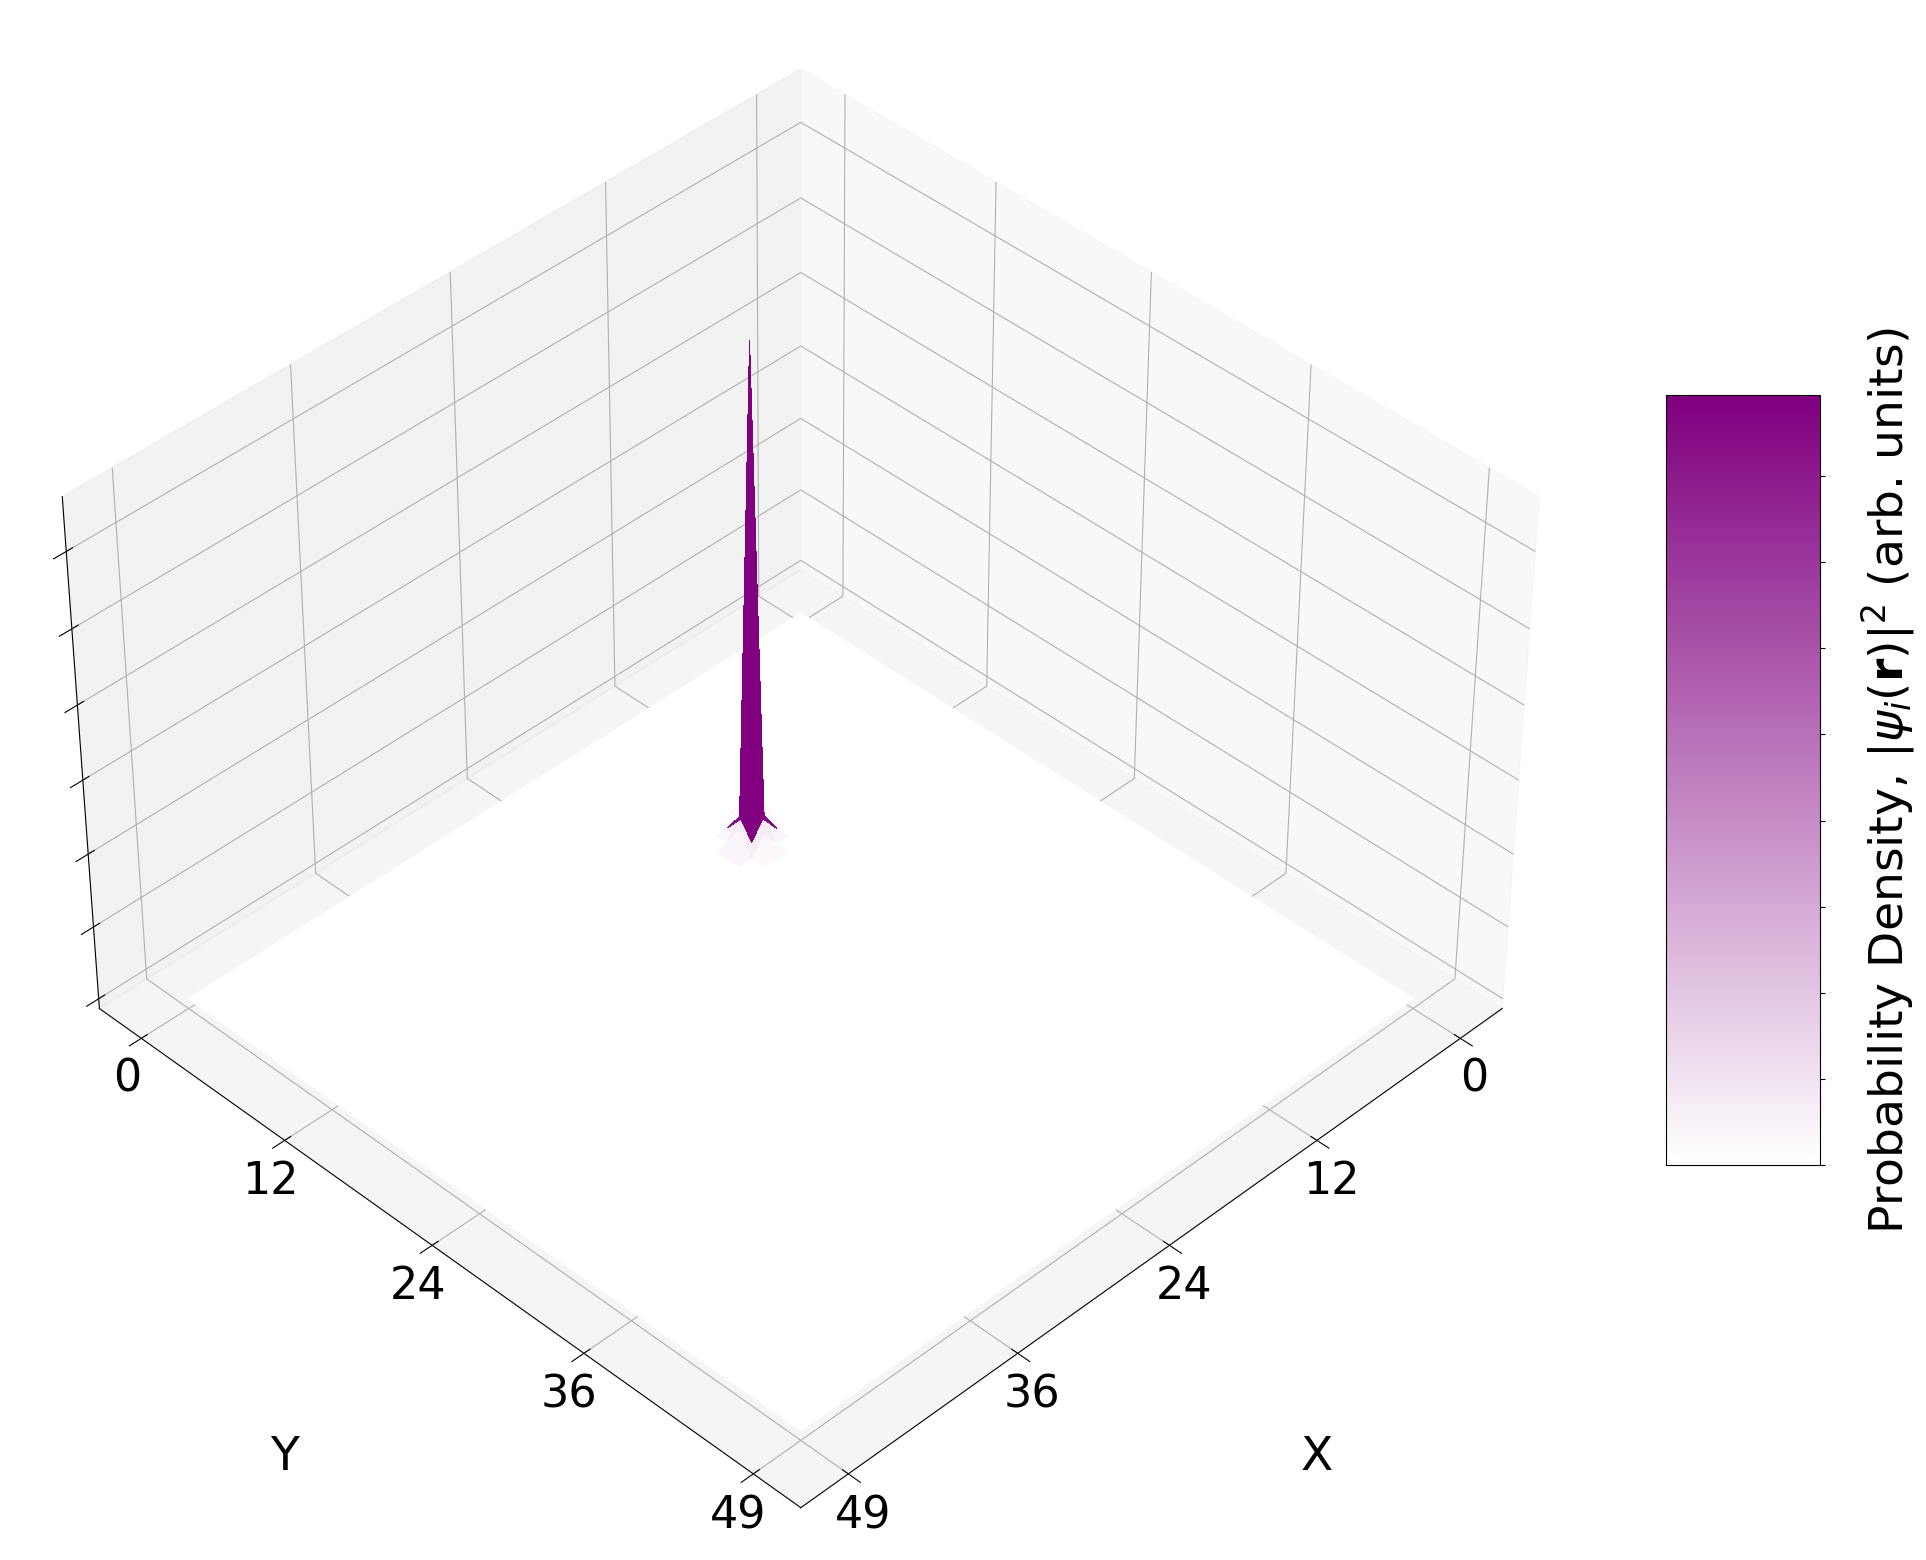

In [259]:
model50.eigenstate_prob_density(wavefunction_loc[:,0], figsize=(30,20), scale_factor=40, save_path='Anderson_localised.pdf')

In [237]:
_, _, wavefunction_loc1 = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=20, theta_x=0, theta_y=0)

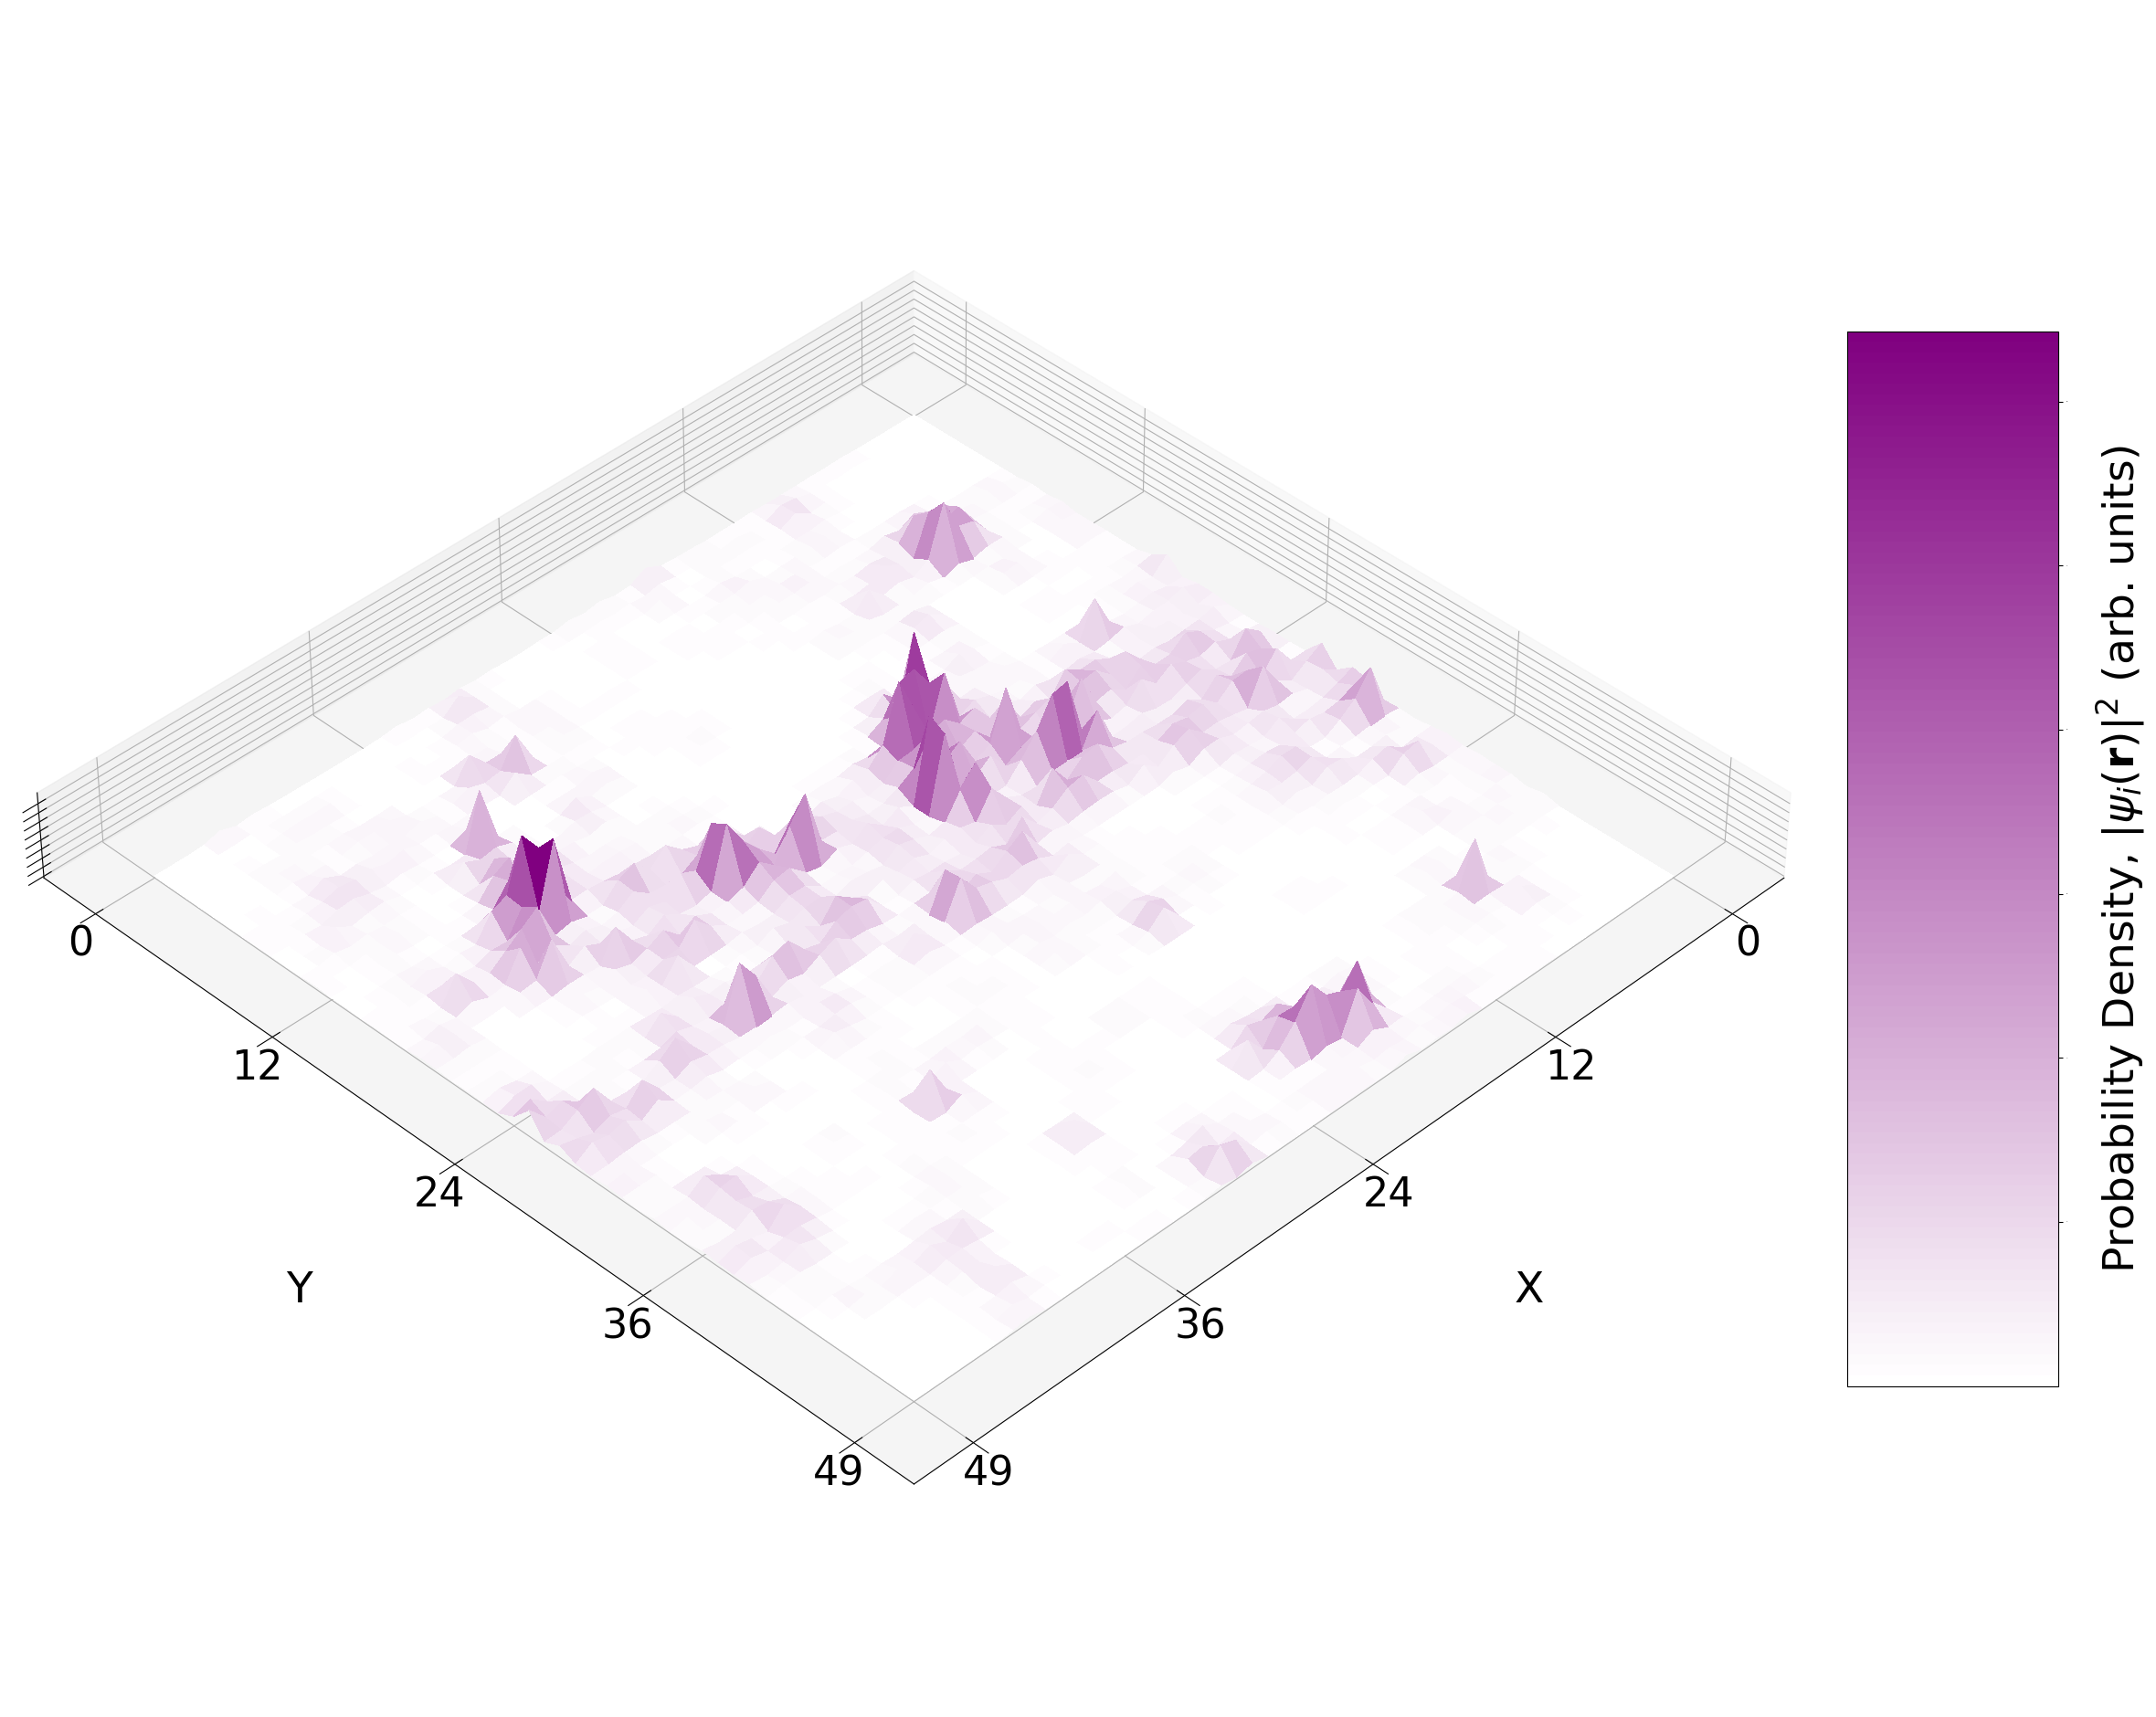

In [264]:
model50.eigenstate_prob_density(wavefunction_loc1[:,1252], figsize=(30,30), scale_factor=500)

In [58]:
_, _, wavefunction_qc = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=2, theta_x=0, theta_y=0, fully_disorder=False)

phi1 is 0 phi2 is 0


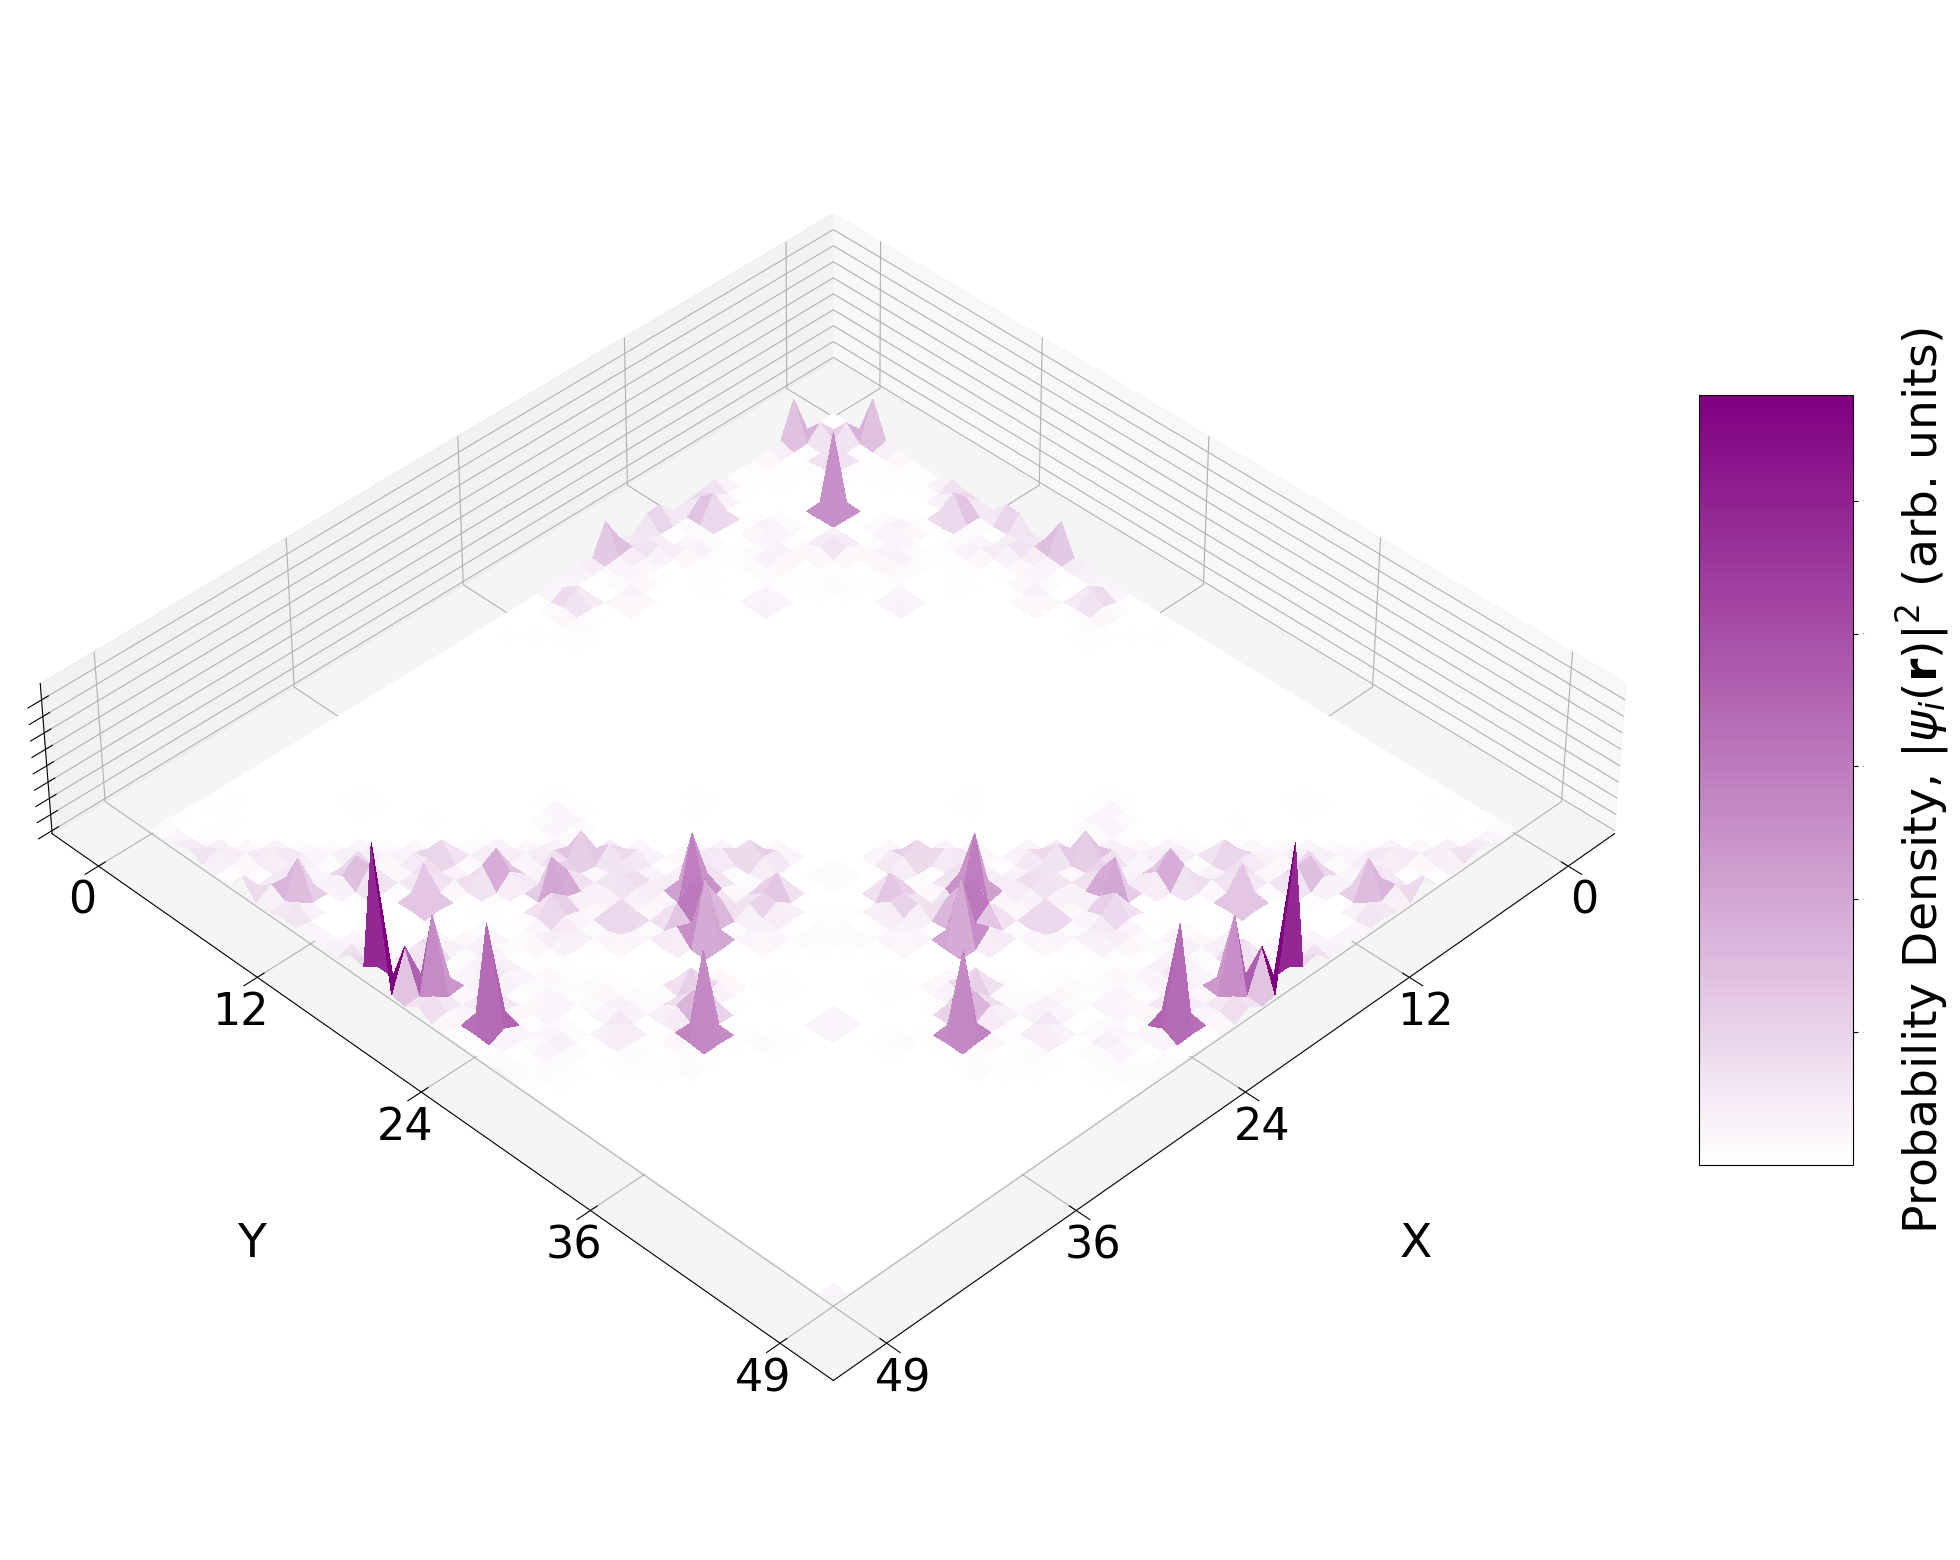

In [268]:
model50.eigenstate_prob_density(wavefunction_qc[:,1231], figsize=(30, 20), scale_factor=300, save_path='critical2_1231.pdf')

In [99]:
_, _, wavefunction_qc1 = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=6, theta_x=0, theta_y=0, fully_disorder=False)

phi1 is 0 phi2 is 0


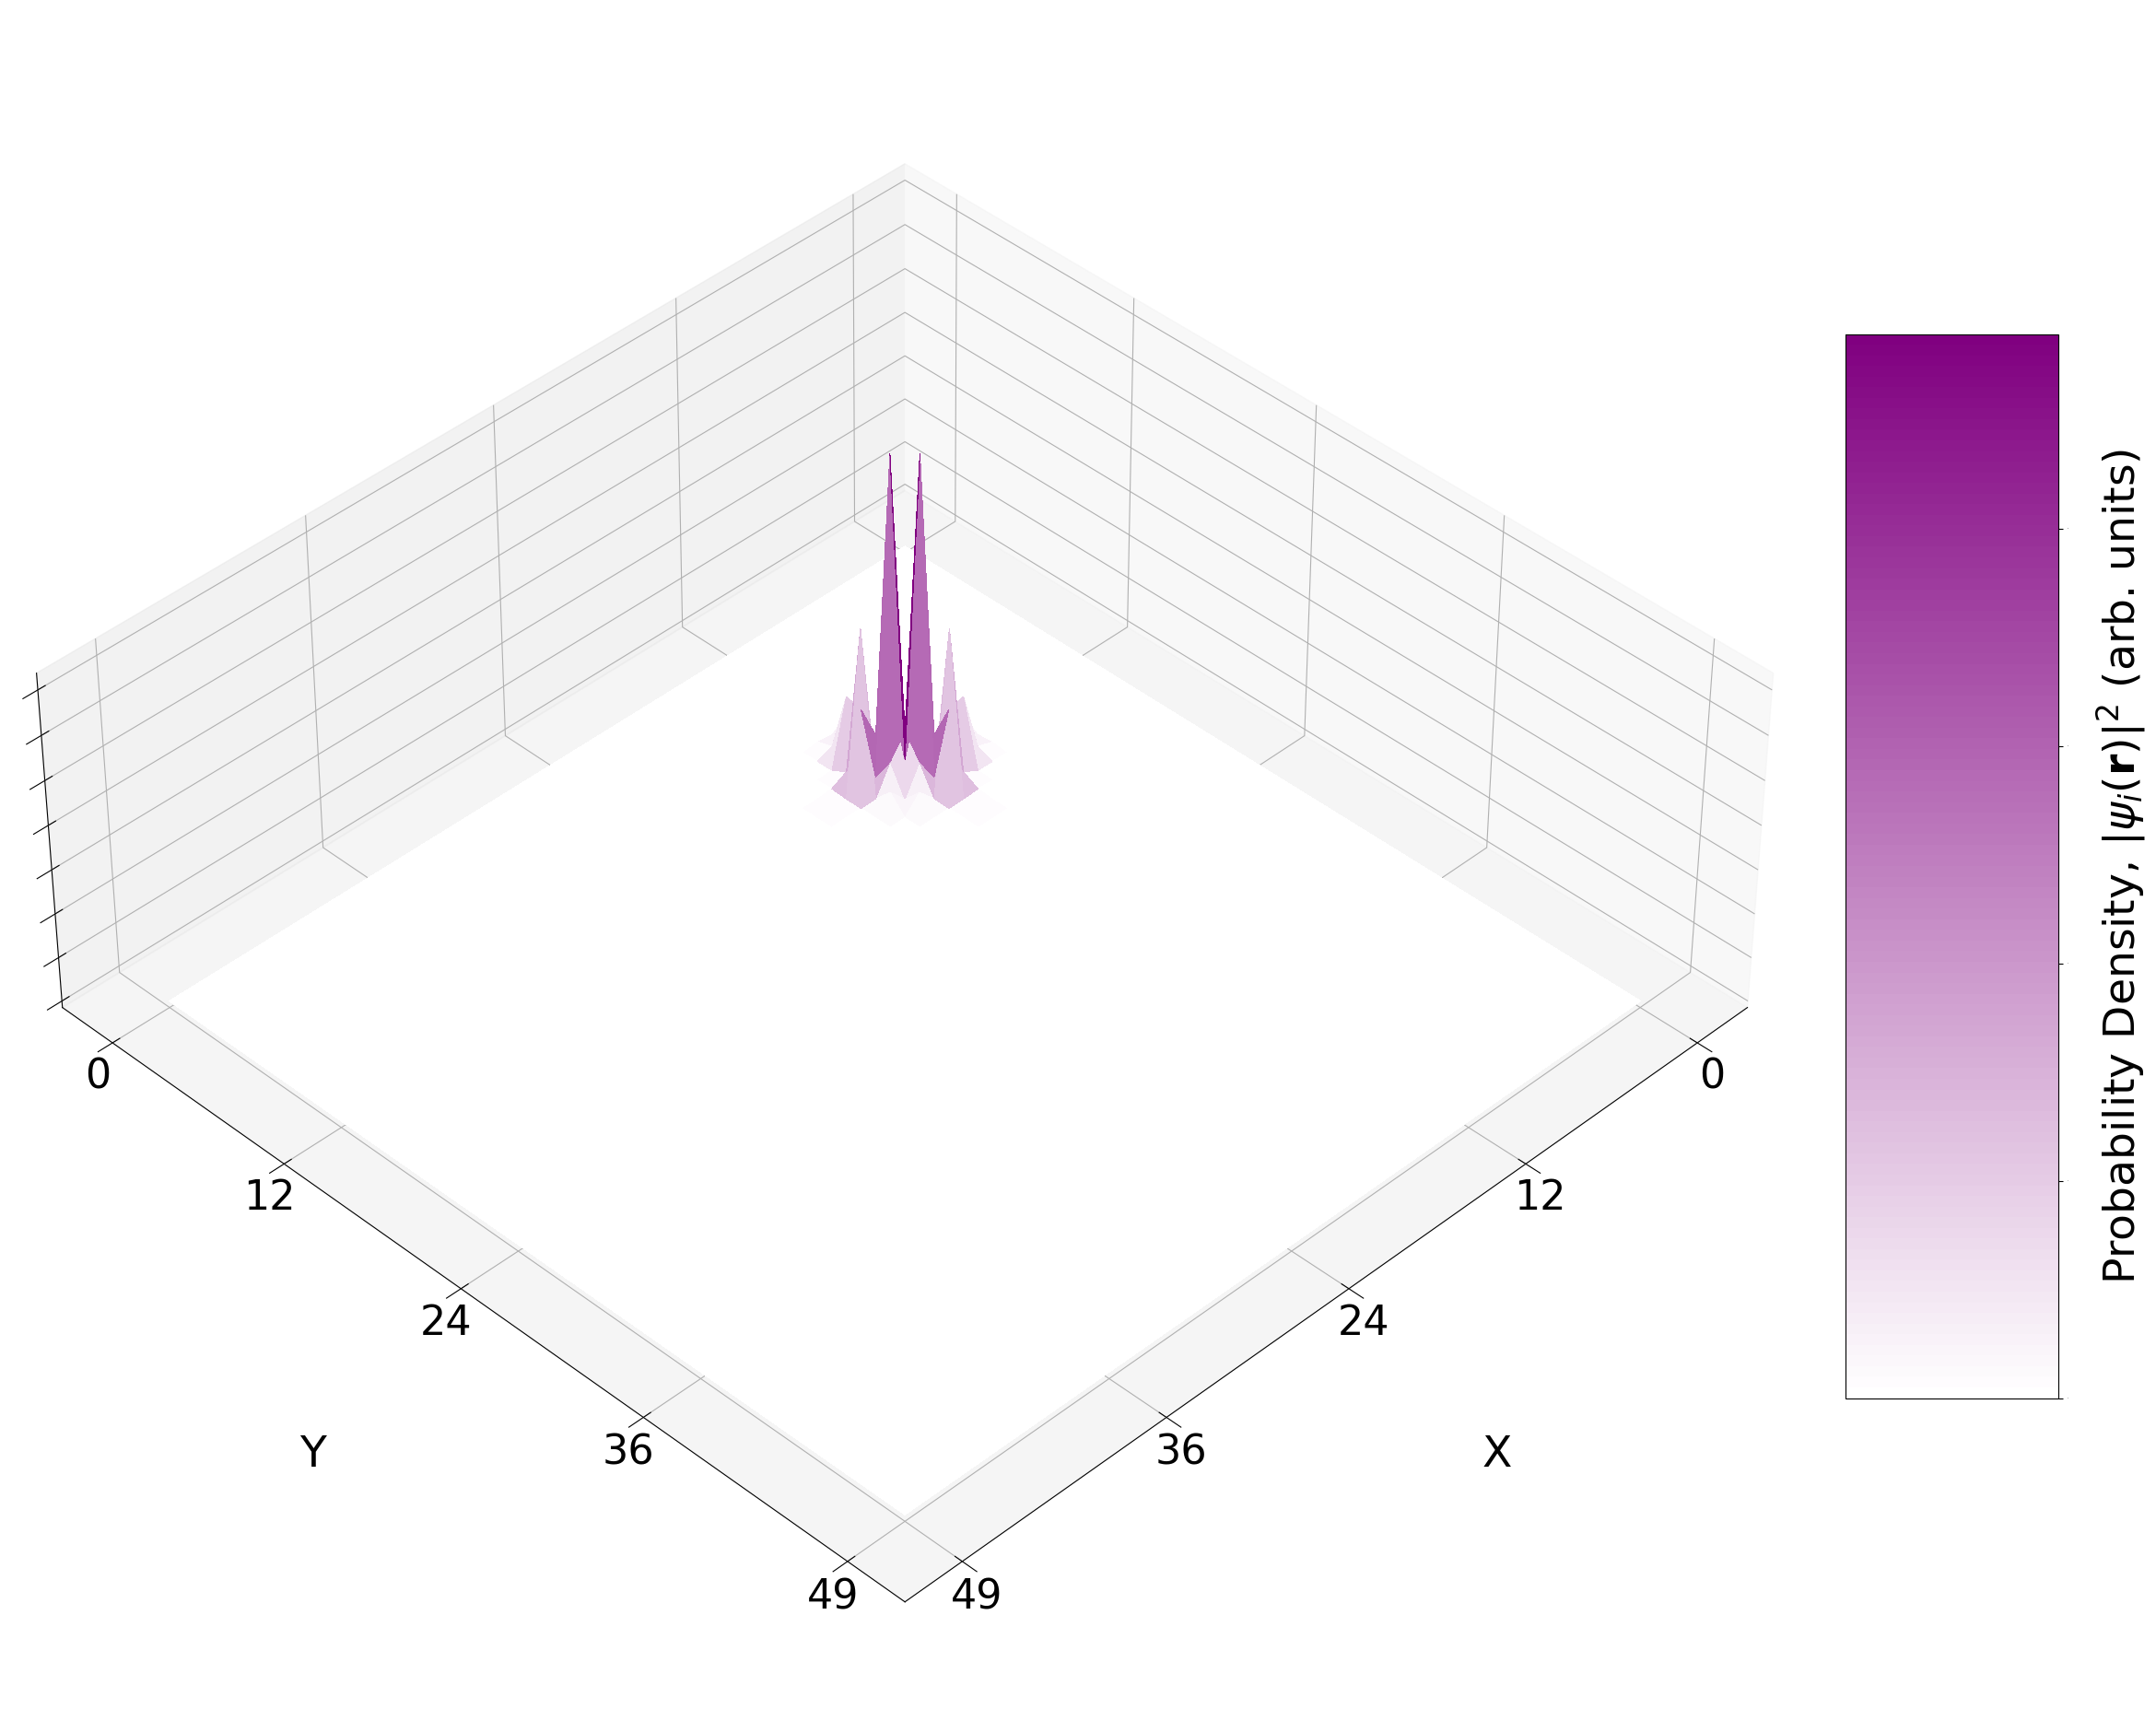

In [267]:
model50.eigenstate_prob_density(wavefunction_qc1[:,1400], figsize=(30,30), scale_factor=100)

In [209]:
_, _, wavefunction_qc2 = model50.quasienergies_states_bulk(steps_per_segment=120, vdT=40, theta_x=0, theta_y=0, fully_disorder=False)

phi1 is 0 phi2 is 0


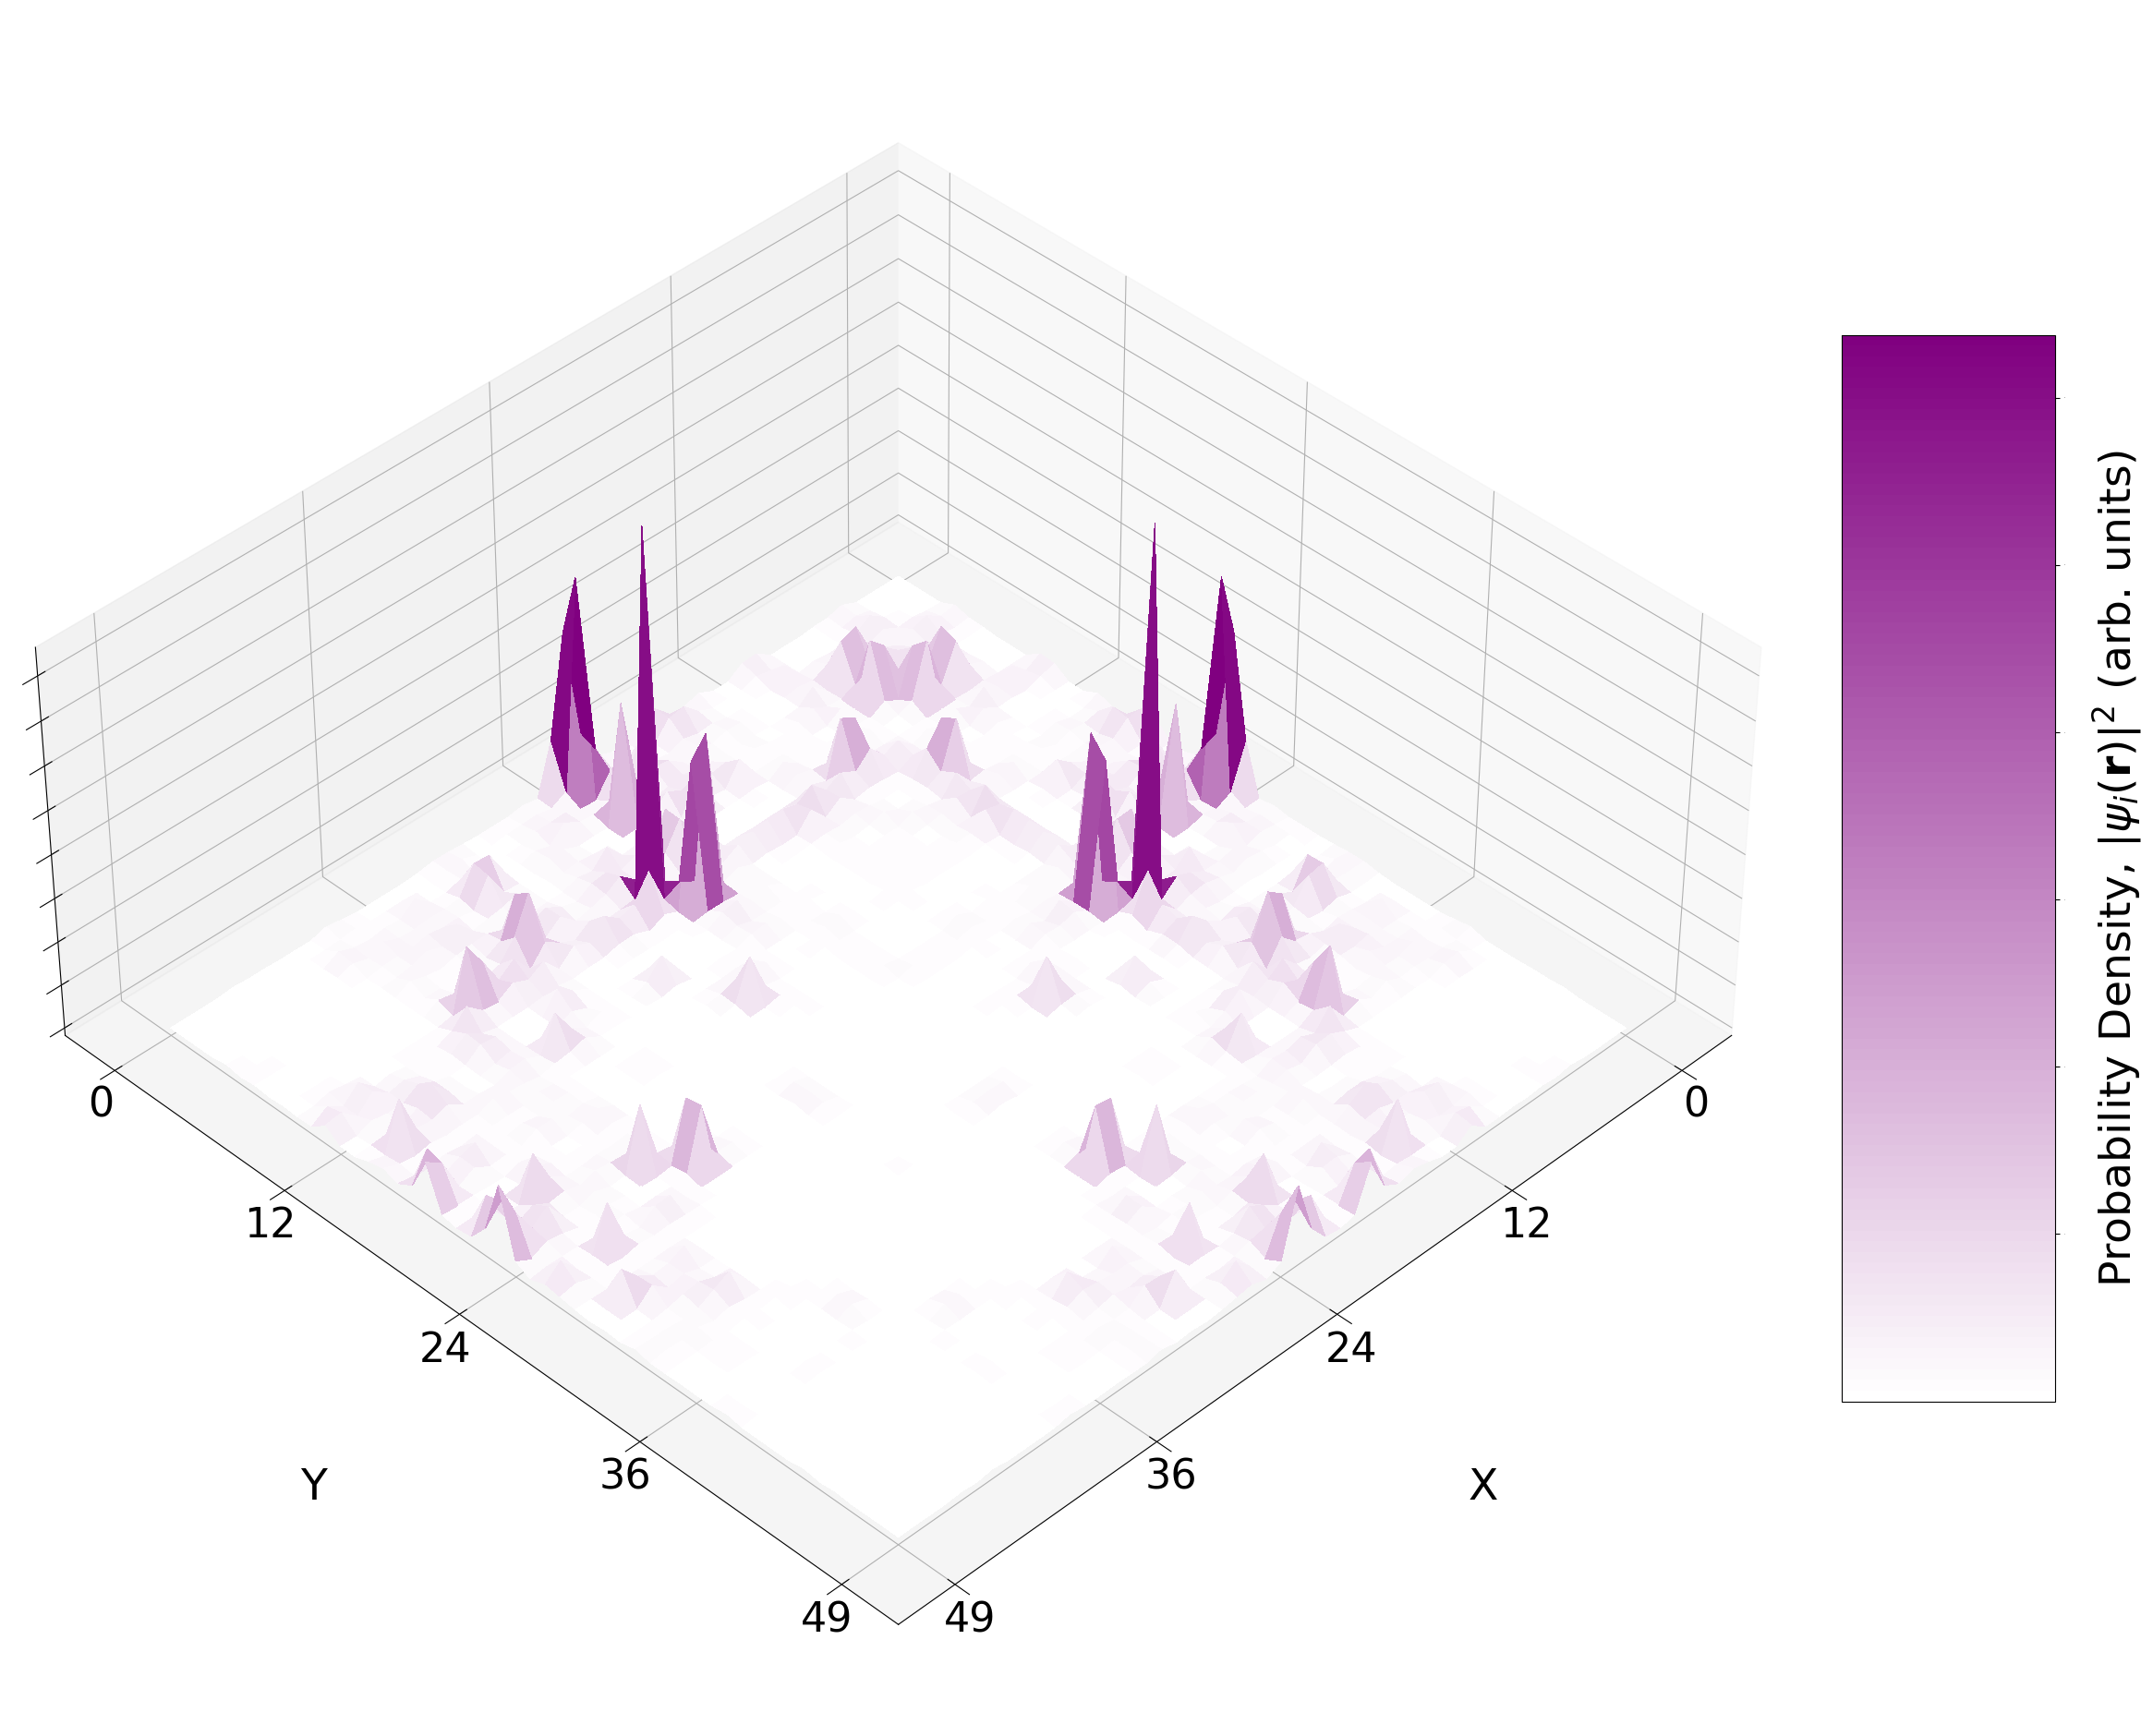

In [278]:
model50.eigenstate_prob_density(wavefunction_qc2[:,1600], figsize=(30,30), scale_factor=700)

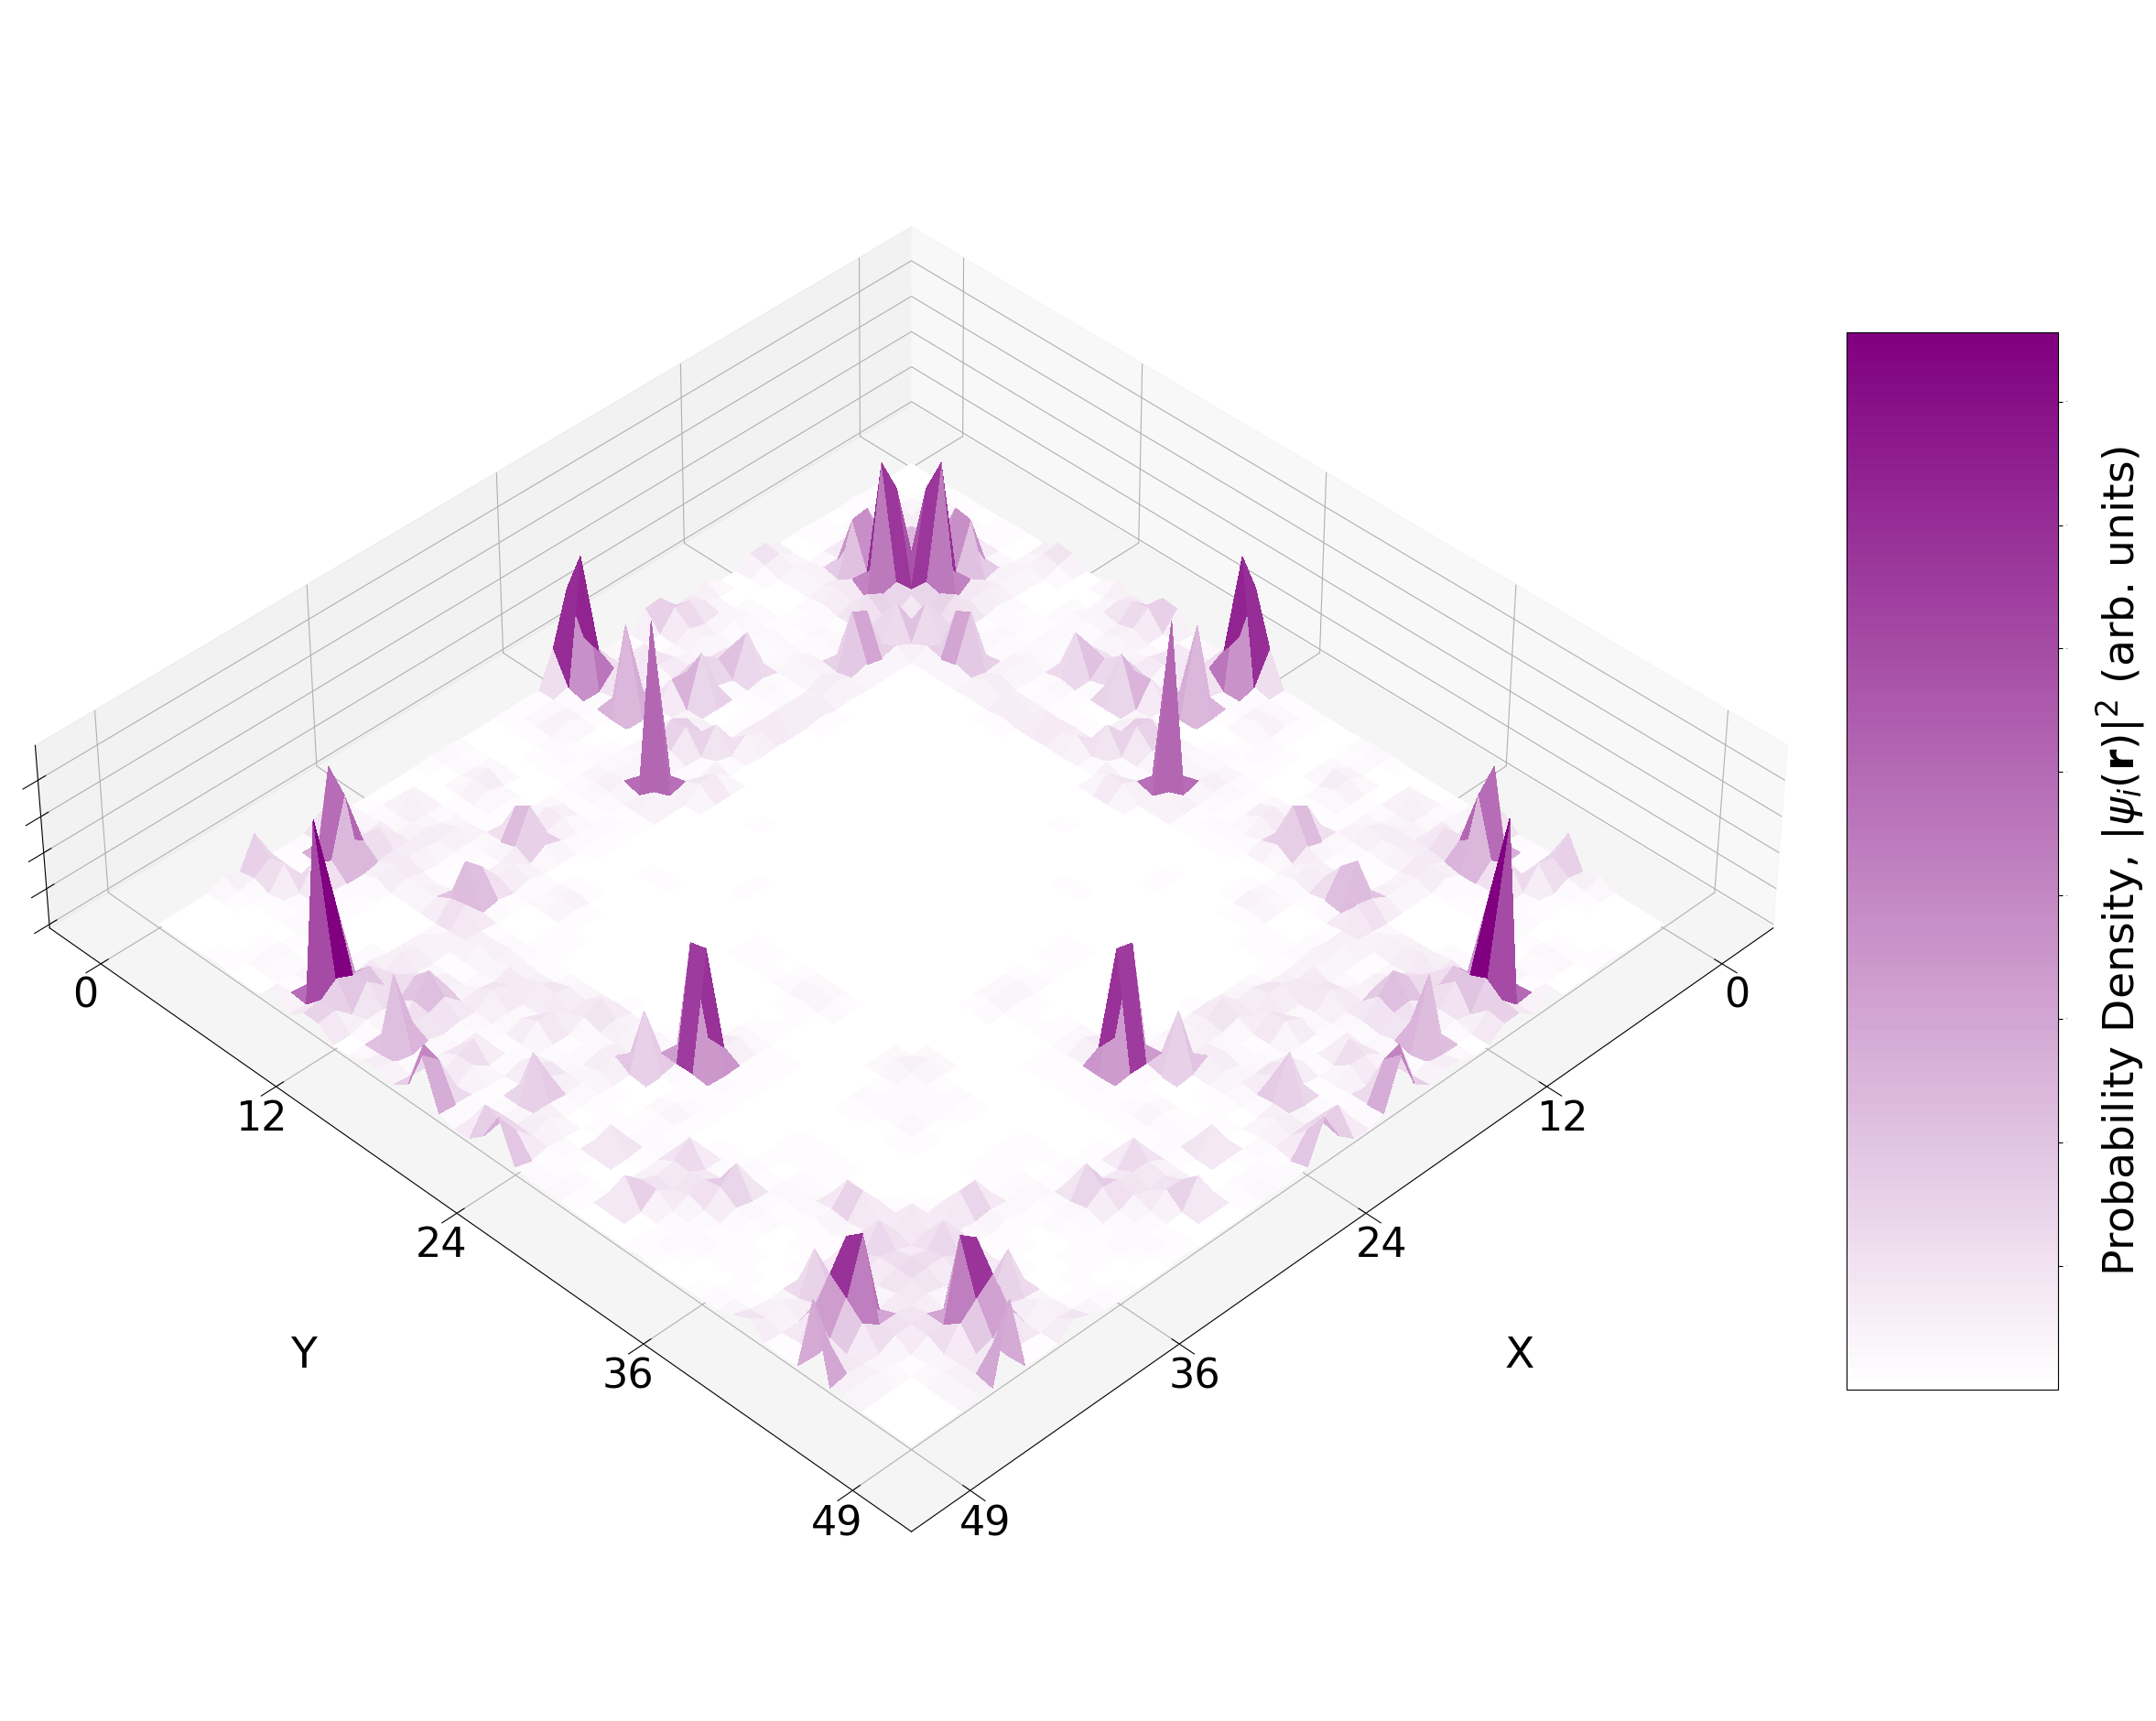

In [279]:
model50.eigenstate_prob_density(wavefunction_qc2[:,1601], figsize=(30,30), scale_factor=700)

In [280]:
model50.eigenstate_prob_density(wavefunction_qc2[:,1602], figsize=(30,30), scale_factor=700)

In [7]:
model30.X_operator()

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ..., 27.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0., 28.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0., 29.]], device='cuda:0')

In [8]:
model30.Y_operator()

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ..., 29.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0., 29.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0., 29.]], device='cuda:0')

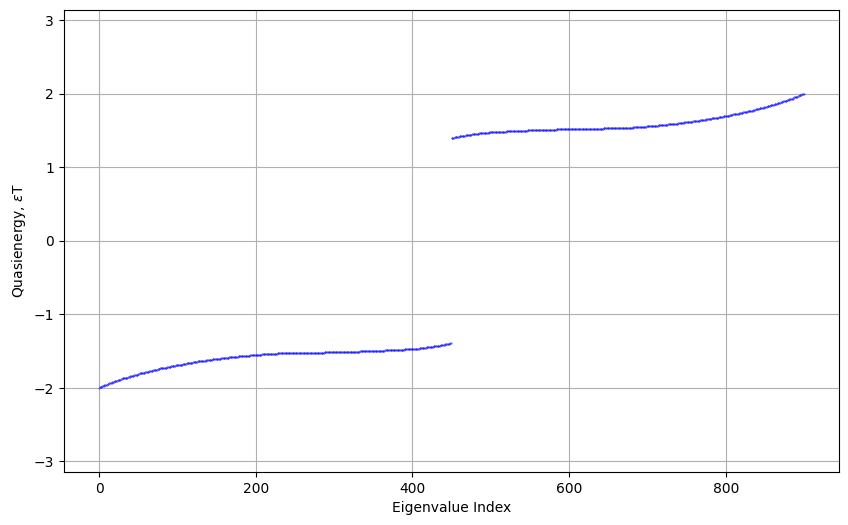

In [22]:
spectra1 = model30_1.quasienergies_states_open(steps_per_segment=100, vdT=0, plot=True)

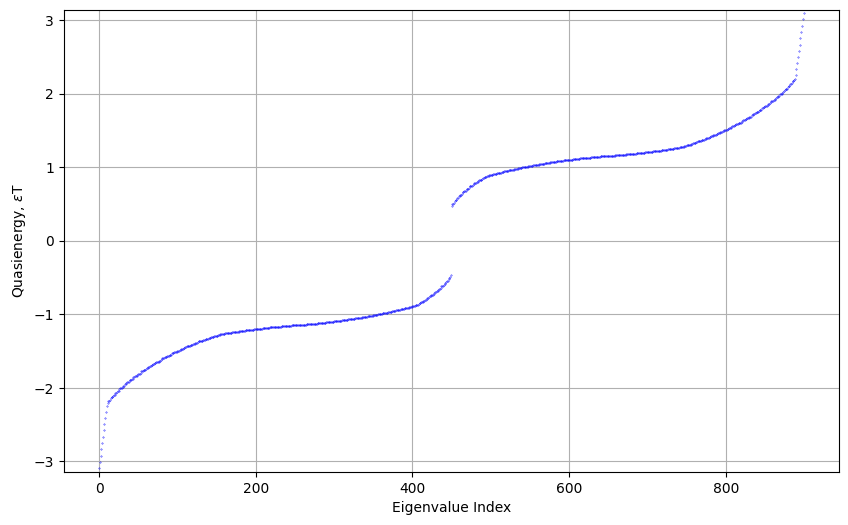

In [23]:
spectra2 = model30_2.quasienergies_states_open(steps_per_segment=100, vdT=0, plot=True)

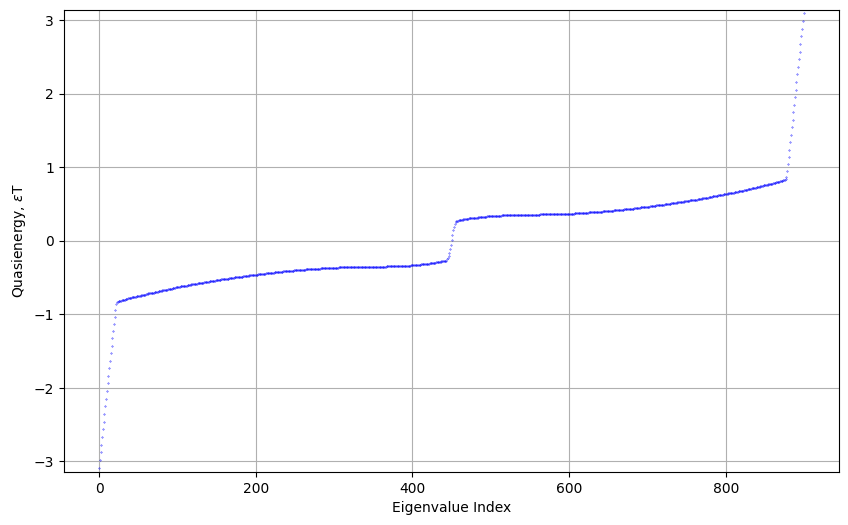

In [24]:
spectra = model30.quasienergies_states_open(steps_per_segment=100, vdT=0, plot=True)

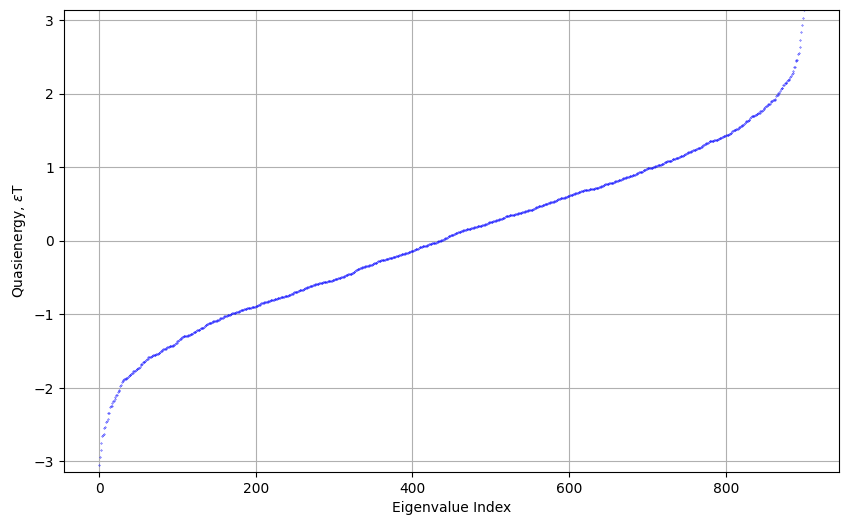

In [25]:
spectra = model30.quasienergies_states_open(steps_per_segment=100, vdT=3, plot=True)

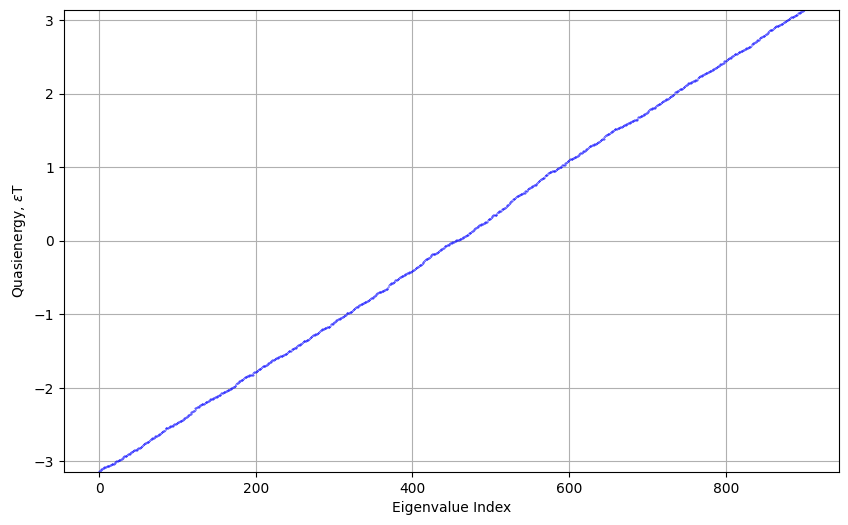

In [26]:
spectra = model30.quasienergies_states_open(steps_per_segment=100, vdT=30, plot=True)

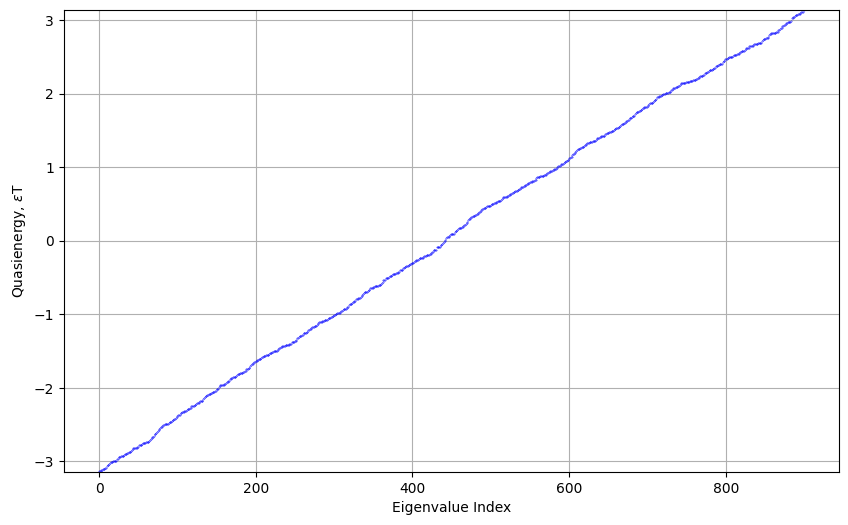

In [27]:
spectra = model30.quasienergies_states_open(steps_per_segment=100, vdT=70, plot=True)

In [20]:
L = model30.spectral_localizer(epsilonT=0, kappa=0.01, x=0, y=0, steps_per_segment=100, vdT=0)

In [21]:
L1 = model30.spectral_localizer(epsilonT=0, kappa=0.01, x=-3, y=-3, steps_per_segment=100, vdT=0)

In [22]:
model30.localiser_gap(L)

tensor(0.0508, device='cuda:0', dtype=torch.float64)

In [23]:
model30.localiser_gap(L1)

tensor(0.0910, device='cuda:0', dtype=torch.float64)